In [1]:
# import libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# import the dataset
train_file=pd.read_csv("churn_prediction_data/train.csv")
test_file=pd.read_csv("churn_prediction_data/test.csv")
train_file.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0


In [3]:
# check missing value
train_file.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# show some statistic
train_file.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5001.026625,1.569089e+07,630.804875,42.988125,4.567375,100569.286116,1.534250,0.702750,0.516875,100103.554906,0.204000
std,2879.566761,7.187306e+04,59.076984,7.515870,1.272758,31431.771836,0.582554,0.457076,0.499746,24511.460933,0.402994
min,1.000000,1.556571e+07,446.000000,28.000000,2.000000,62397.410000,1.000000,0.000000,0.000000,57522.070000,0.000000
25%,2500.750000,1.562882e+07,590.000000,38.000000,4.000000,62397.410000,1.000000,0.000000,0.000000,79216.925000,0.000000
50%,5014.000000,1.569017e+07,631.000000,42.000000,5.000000,111118.600000,1.000000,1.000000,1.000000,100056.110000,0.000000
75%,7474.250000,1.575398e+07,672.000000,47.000000,6.000000,126500.100000,2.000000,1.000000,1.000000,121104.542500,0.000000
max,9999.000000,1.581569e+07,753.000000,81.000000,7.000000,188500.680000,4.000000,1.000000,1.000000,142481.990000,1.000000


In [5]:
# get customer Exited count
train_file['Exited'].value_counts()

0    6368
1    1632
Name: Exited, dtype: int64

C:\Users\Peggy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

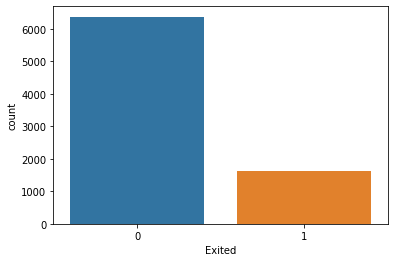

In [6]:
# visualize the count of customer Exited
sns.countplot(train_file['Exited'])

In [7]:
# what is the percentage of customers that are Exited?
num_Exited=train_file[train_file['Exited']==1].shape[0]
num_nonExited=train_file[train_file['Exited']==0].shape[0]

# print the percentage of customers that stayed
print(num_Exited/(num_Exited+num_nonExited)*100,'% of customers stayed with the company.')

# print the percentage of customers that left
print(num_nonExited/(num_Exited+num_nonExited)*100,'% of customers left with the company.')

20.4 % of customers stayed with the company.
79.60000000000001 % of customers left with the company.


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

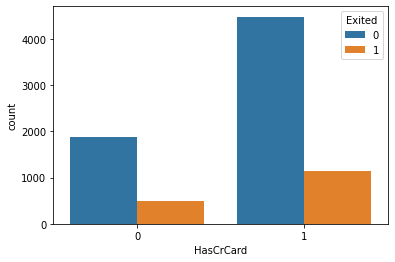

In [8]:
# visualize the Exited count for both males and females
sns.countplot(x='HasCrCard',hue='Exited',data=train_file)

In [9]:
# remove unnecessary column
cleaned_train_file=train_file.drop(['RowNumber','CustomerId','Surname'],axis=1)
cleaned_train_file.shape

(8000, 11)

In [10]:
# convert all of the non-numeric columns to numeric
for column in cleaned_train_file.columns:
    # 如果該column為數值型資料就繼續下一個column
    if cleaned_train_file[column].dtype==np.number:
        continue
    # 將類別型資料轉換後再放回cleaned_train_file[column]
    cleaned_train_file[column]=LabelEncoder().fit_transform(cleaned_train_file[column])
    
for column in test_file.columns:
    # 如果該column為數值型資料就繼續下一個column
    if test_file[column].dtype==np.number:
        continue
    # 將類別型資料轉換後再放回cleaned_train_file[column]
    test_file[column]=LabelEncoder().fit_transform(test_file[column])

C:\Users\Peggy\AppData\Local\Temp/ipykernel_12784/1304661565.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_train_file[column].dtype==np.number:
C:\Users\Peggy\AppData\Local\Temp/ipykernel_12784/1304661565.py:11: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if test_file[column].dtype==np.number:


In [11]:
# show the data type of the new dataset 
cleaned_train_file.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
cleaned_train_file.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,252,2,1,10,3,114051.97,1,0,1,107577.29,0
1,214,0,0,26,2,62397.41,0,1,0,113088.60,1
2,204,0,0,3,3,119903.67,0,1,1,132925.17,0
3,124,2,0,12,2,104257.86,0,1,0,110857.33,0
4,285,2,1,14,3,120387.73,0,0,1,126378.57,0


In [13]:
# scaled the data
x=cleaned_train_file.drop('Exited',axis=1) # feature data set
y=cleaned_train_file['Exited']

x=StandardScaler().fit_transform(x)

In [14]:
# split the data into 80% training and 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
# total_file=pd.DataFrame()
# total_file=total_data.append(cleaned_train_file)
# total_file=total_data.append(test_file)

In [16]:
# x_train = cleaned_train_file.drop('Exited',axis=1) # feature data set
# y_train = cleaned_train_file['Exited'] 

# # x_test = test_file[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
# x_test=total_file[total_file['Exited'].isnull()][['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].values
# y_test = test_file

In [17]:
# create the model
model=LogisticRegression()

# train the model
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
# create the predictions on the test data
predictions=model.predict(x_test)

# print the predictions
print(predictions)

[0 0 0 ... 1 0 0]


In [19]:
# check the precision, recall, fscore
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1265
           1       0.62      0.19      0.29       335

    accuracy                           0.81      1600
   macro avg       0.72      0.58      0.59      1600
weighted avg       0.78      0.81      0.76      1600

